In [1]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Read each CSV into a `DataFrame`.

In [2]:
hallelujah_path = Path('data', 'good_hallelujah_trials_and_signals.csv')
into_dust_path = Path('data', 'good_into_dust_trials_and_signals.csv')
raining_blood_path = Path('data', 'good_raining_blood_trials_and_signals.csv')

hallelujah_df = pd.read_csv(hallelujah_path, index_col='_id')
into_dust_df = pd.read_csv(into_dust_path, index_col='_id')
raining_blood_df = pd.read_csv(raining_blood_path, index_col='_id')

Concatenate all song `DataFrame`s into a master `DataFrame`.

In [3]:
all_df = pd.concat([hallelujah_df, into_dust_df, raining_blood_df], axis=0, sort=False)

In [4]:
pd.set_option('display.max_columns', None)
all_df.describe()

,answers.musical_expertise,answers.age,control_chillsshiversthrills,control_activity,control_tension,control_familiarity,control_engagement,control_positivity,control_like_dislike,song_chillsshiversthrills,song_activity,song_tension,song_familiarity,song_engagement,song_positivity,song_like_dislike,control_inspired,control_wonder,control_spirituality,control_thrills,control_chills,control_tenderness,control_nostalgia,control_goosebumps,control_overwhelmed,control_shivers,song_inspired,song_wonder,song_spirituality,song_thrills,song_chills,song_tenderness,song_nostalgia,song_goosebumps,song_overwhelmed,song_shivers,control_transcendence,control_sadness,control_joyfulactivation,control_peacefulness,control_power,song_transcendence,song_sadness,song_joyfulactivation,song_peacefulness,song_power,answers.personality.trusting,answers.personality.artistic,answers.personality.imagination,answers.personality.reserved,answers.personality.outgoing,answers.personality.lazy,answers.personality.stress,answers.personality.nervous,answers.personality.fault,answers.personality.thorough,answers.concentration,answers.musicpref.traditional_irish,answers.musicpref.jazz,answers.musicpref.folk,answers.musicpref.hiphop,answers.musicpref.classical,answers.musicpref.none,answers.musicpref.rock,answers.musicpref.hip_hop,answers.musicpref.world,answers.musicpref.pop,answers.musicpref.dance
count,1110.000000,1404.000000,0.0,660.000000,660.000000,661.0,660.000000,660.000000,660.000000,273.000000,1309.000000,1097.000000,1309.000000,1309.000000,1309.000000,1309.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.000000,163.000000,108.000000,108.000000,375.000000,163.000000,163.000000,108.000000,108.000000,108.000000,0.0,0.0,0.0,0.0,660.000000,55.000000,55.000000,55.000000,55.000000,983.000000,661.000000,661.000000,660.000000,661.000000,660.000000,661.000000,661.000000,660.000000,660.000000,660.000000,661.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000
mean,2.640541,26.356838,NaN,2.792424,3.437879,-1.0,3.109091,3.204545,2.993939,2.051282,3.354469,3.621696,2.371276,3.388083,3.241406,3.217723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.388889,2.269939,2.111111,2.092593,2.058667,2.392638,2.552147,1.824074,2.351852,1.740741,NaN,NaN,NaN,NaN,3.189394,2.672727,2.381818,2.127273,2.727273,3.326551,3.658094,2.319213,3.745455,3.151286,3.150000,3.626324,3.124054,3.621212,3.198485,3.160606,3.838124,0.049858,0.194444,0.079060,0.044160,0.326923,0.007835,0.438746,0.137464,0.161681,0.665954,0.203704
std,1.089989,14.062589,NaN,1.035458,1.115794,0.0,1.209563,1.059237,1.274220,1.190159,1.143900,1.226235,1.408135,1.342909,1.213997,1.412848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.331385,1.286499,1.341873,1.249576,1.233131,1.446305,1.515978,1.100796,1.362480,1.096898,NaN,NaN,NaN,NaN,1.151186,1.414928,1.353882,1.139437,1.483921,1.216057,1.033330,1.203307,1.063419,1.119301,1.173913,1.139313,1.125347,1.102696,1.109347,1.037225,1.070032,0.217728,0.395913,0.269928,0.205523,0.469256,0.088198,0.496411,0.344460,0.368289,0.471824,0.402895
min,1.000000,1.000000,NaN,1.000000,1.000000,-1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,17.000000,NaN,2.000000,3.000000,-1.0,2.000000,3.000000,2.000000,1.000000,3.000000,3.000000,1.000000,2.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,3.000000,1.000000,1.000000,1.000000,1.000000,2.500000,3.0

# Data Cleanup

Drop `answers.` and `metadata.` from column names.

In [5]:
def strip_prefix(prefix=''):
    def strip_fn(s):
        if s.startswith(prefix):
            return s[len(prefix):]
        return s
    return strip_fn

In [6]:
strip_answers = strip_prefix('answers.')
all_df = all_df.rename(strip_answers, axis='columns')

strip_metadata = strip_prefix('metadata.')
all_df = all_df.rename(strip_metadata, axis='columns')

In [7]:
for c in all_df.columns:
    new_c = c.replace('.', '_')
    mapper_dict = {}
    mapper_dict[c] = new_c
    all_df = all_df.rename(mapper=mapper_dict, axis='columns')

In [8]:
all_df.describe()

,musical_expertise,age,control_chillsshiversthrills,control_activity,control_tension,control_familiarity,control_engagement,control_positivity,control_like_dislike,song_chillsshiversthrills,song_activity,song_tension,song_familiarity,song_engagement,song_positivity,song_like_dislike,control_inspired,control_wonder,control_spirituality,control_thrills,control_chills,control_tenderness,control_nostalgia,control_goosebumps,control_overwhelmed,control_shivers,song_inspired,song_wonder,song_spirituality,song_thrills,song_chills,song_tenderness,song_nostalgia,song_goosebumps,song_overwhelmed,song_shivers,control_transcendence,control_sadness,control_joyfulactivation,control_peacefulness,control_power,song_transcendence,song_sadness,song_joyfulactivation,song_peacefulness,song_power,personality_trusting,personality_artistic,personality_imagination,personality_reserved,personality_outgoing,personality_lazy,personality_stress,personality_nervous,personality_fault,personality_thorough,concentration,musicpref_traditional_irish,musicpref_jazz,musicpref_folk,musicpref_hiphop,musicpref_classical,musicpref_none,musicpref_rock,musicpref_hip_hop,musicpref_world,musicpref_pop,musicpref_dance
count,1110.000000,1404.000000,0.0,660.000000,660.000000,661.0,660.000000,660.000000,660.000000,273.000000,1309.000000,1097.000000,1309.000000,1309.000000,1309.000000,1309.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.000000,163.000000,108.000000,108.000000,375.000000,163.000000,163.000000,108.000000,108.000000,108.000000,0.0,0.0,0.0,0.0,660.000000,55.000000,55.000000,55.000000,55.000000,983.000000,661.000000,661.000000,660.000000,661.000000,660.000000,661.000000,661.000000,660.000000,660.000000,660.000000,661.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000
mean,2.640541,26.356838,NaN,2.792424,3.437879,-1.0,3.109091,3.204545,2.993939,2.051282,3.354469,3.621696,2.371276,3.388083,3.241406,3.217723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.388889,2.269939,2.111111,2.092593,2.058667,2.392638,2.552147,1.824074,2.351852,1.740741,NaN,NaN,NaN,NaN,3.189394,2.672727,2.381818,2.127273,2.727273,3.326551,3.658094,2.319213,3.745455,3.151286,3.150000,3.626324,3.124054,3.621212,3.198485,3.160606,3.838124,0.049858,0.194444,0.079060,0.044160,0.326923,0.007835,0.438746,0.137464,0.161681,0.665954,0.203704
std,1.089989,14.062589,NaN,1.035458,1.115794,0.0,1.209563,1.059237,1.274220,1.190159,1.143900,1.226235,1.408135,1.342909,1.213997,1.412848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.331385,1.286499,1.341873,1.249576,1.233131,1.446305,1.515978,1.100796,1.362480,1.096898,NaN,NaN,NaN,NaN,1.151186,1.414928,1.353882,1.139437,1.483921,1.216057,1.033330,1.203307,1.063419,1.119301,1.173913,1.139313,1.125347,1.102696,1.109347,1.037225,1.070032,0.217728,0.395913,0.269928,0.205523,0.469256,0.088198,0.496411,0.344460,0.368289,0.471824,0.402895
min,1.000000,1.000000,NaN,1.000000,1.000000,-1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,17.000000,NaN,2.000000,3.000000,-1.0,2.000000,3.000000,2.000000,1.000000,3.000000,3.000000,1.000000,2.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,3.000000,1.000000,1.000000,1.000000,1.000000,2.500000,3.000000,1.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

## `answers.musical_expertise`

Replace missing values with column median.

In [9]:
np.any(all_df.musical_expertise.isna())

True

In [10]:
all_df.musical_expertise.fillna(0, inplace=True)

In [11]:
def column_hist(col):
    bins = np.arange(col.min() - 0.5, col.max() + 1.5, 1)
    plt.hist(col, bins=bins)
    plt.title('Histogram for ' + col.name);

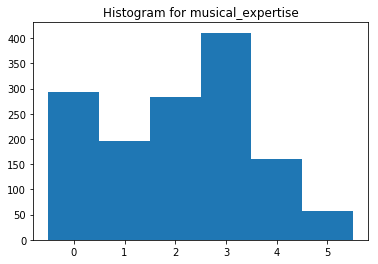

In [12]:
column_hist(all_df.musical_expertise)

In [13]:
all_df.musical_expertise.value_counts()

3.0    411
0.0    294
2.0    284
1.0    196
4.0    161
5.0     58
Name: musical_expertise, dtype: int64

In [14]:
np.any(all_df.musical_expertise.isna())

False

In [15]:
all_df.loc[:, 'musical_expertise'] = all_df.loc[:, 'musical_expertise'].astype('int').astype('category')

## `age`

Check for missing values.

In [16]:
np.any(all_df.age.isna())

False

In [17]:
q25, q75 = all_df.age.quantile(q=.25), all_df.age.quantile(q=.75)
q25, q75

(17.0, 33.0)

In [18]:
iqr = q75 - q25
iqr

16.0

In [19]:
low_cut, high_cut = q25 - (2 * iqr), q75 + (2 * iqr)
low_cut, high_cut

(-15.0, 65.0)

In [20]:
age_outliers = all_df.age[(all_df.age < 6) | (all_df.age > 100)]
age_outliers

_id
570eb76e83a73509d0e035d9      1.0
570eb76d83a73509d0e0359e      1.0
570eb72583a73509d0e01db8    121.0
570eb72883a73509d0e01e8d      5.0
570eb7b183a73509d0e04a93      5.0
570eb78283a73509d0e03c78      5.0
570eb72b83a73509d0e01f7c      5.0
570eb73683a73509d0e02363      5.0
570eb75683a73509d0e02ddd      5.0
570eb78783a73509d0e03de4    121.0
570eb7b283a73509d0e04ad8      4.0
5410eed508ad6ee3090e24d9      4.0
5410ef7108ad6ee3090e270f      4.0
5410f03108ad6ee3090e29cf      4.0
570eb7a183a73509d0e045fd    121.0
570eb72c83a73509d0e01fdd      1.0
Name: age, dtype: float64

In [21]:
age_outlier_idx = age_outliers.index
age_outlier_idx

Index(['570eb76e83a73509d0e035d9', '570eb76d83a73509d0e0359e',
       '570eb72583a73509d0e01db8', '570eb72883a73509d0e01e8d',
       '570eb7b183a73509d0e04a93', '570eb78283a73509d0e03c78',
       '570eb72b83a73509d0e01f7c', '570eb73683a73509d0e02363',
       '570eb75683a73509d0e02ddd', '570eb78783a73509d0e03de4',
       '570eb7b283a73509d0e04ad8', '5410eed508ad6ee3090e24d9',
       '5410ef7108ad6ee3090e270f', '5410f03108ad6ee3090e29cf',
       '570eb7a183a73509d0e045fd', '570eb72c83a73509d0e01fdd'],
      dtype='object', name='_id')

In [22]:
all_df = all_df.drop(index=age_outlier_idx)
age_outliers = all_df.age[(all_df.age < 6) | (all_df.age > 100)]
age_outliers

Series([], Name: age, dtype: float64)

## `control_chillsshiversthrills`

In [23]:
np.any(all_df.control_chillsshiversthrills.isna())

True

In [24]:
all_df.control_chillsshiversthrills.value_counts()

Series([], Name: control_chillsshiversthrills, dtype: int64)

Drop column, as there are no valid values.

In [25]:
all_df = all_df.drop(columns='control_chillsshiversthrills')

In [26]:
all_df.describe()

,age,control_activity,control_tension,control_familiarity,control_engagement,control_positivity,control_like_dislike,song_chillsshiversthrills,song_activity,song_tension,song_familiarity,song_engagement,song_positivity,song_like_dislike,control_inspired,control_wonder,control_spirituality,control_thrills,control_chills,control_tenderness,control_nostalgia,control_goosebumps,control_overwhelmed,control_shivers,song_inspired,song_wonder,song_spirituality,song_thrills,song_chills,song_tenderness,song_nostalgia,song_goosebumps,song_overwhelmed,song_shivers,control_transcendence,control_sadness,control_joyfulactivation,control_peacefulness,control_power,song_transcendence,song_sadness,song_joyfulactivation,song_peacefulness,song_power,personality_trusting,personality_artistic,personality_imagination,personality_reserved,personality_outgoing,personality_lazy,personality_stress,personality_nervous,personality_fault,personality_thorough,concentration,musicpref_traditional_irish,musicpref_jazz,musicpref_folk,musicpref_hiphop,musicpref_classical,musicpref_none,musicpref_rock,musicpref_hip_hop,musicpref_world,musicpref_pop,musicpref_dance
count,1388.000000,647.000000,647.000000,648.0,647.000000,647.000000,647.000000,273.000000,1293.000000,1084.000000,1293.000000,1293.000000,1293.000000,1293.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.000000,163.000000,108.000000,108.000000,372.000000,163.000000,163.000000,108.000000,108.000000,108.000000,0.0,0.0,0.0,0.0,647.000000,55.000000,55.000000,55.000000,55.000000,967.000000,648.000000,648.000000,647.000000,648.000000,647.000000,648.000000,648.000000,647.000000,647.000000,647.000000,648.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000
mean,26.363833,2.791345,3.440495,-1.0,3.098918,3.197836,2.996909,2.051282,3.351121,3.619926,2.371230,3.379737,3.232019,3.211910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.388889,2.269939,2.111111,2.092593,2.051075,2.392638,2.552147,1.824074,2.351852,1.740741,NaN,NaN,NaN,NaN,3.179289,2.672727,2.381818,2.127273,2.727273,3.324716,3.662037,2.314815,3.749614,3.151235,3.156105,3.635802,3.121914,3.627512,3.200927,3.162287,3.845679,0.050432,0.193804,0.077810,0.044669,0.326369,0.007925,0.440922,0.137608,0.162824,0.669308,0.206052
std,13.261152,1.038598,1.113844,0.0,1.207349,1.063522,1.273688,1.190159,1.138474,1.224334,1.402621,1.343644,1.212804,1.412553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.331385,1.286499,1.341873,1.249576,1.226427,1.446305,1.515978,1.100796,1.362480,1.096898,NaN,NaN,NaN,NaN,1.150584,1.414928,1.353882,1.139437,1.483921,1.213297,1.024421,1.205204,1.058240,1.115563,1.173253,1.134024,1.122600,1.098289,1.108565,1.036456,1.056786,0.218914,0.395420,0.267969,0.206650,0.469053,0.088701,0.496676,0.344612,0.369338,0.470632,0.404614
min,6.000000,1.000000,1.000000,-1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,2.000000,3.000000,-1.0,2.000000,3.000000,2.000000,1.000000,3.000000,3.000000,1.000000,2.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,3.000000,1.000000,1.000000,1.000000,1.000000,2.500000,3.000000,1.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,23.000000,3.000000,3.000000,-1.0,3.000000,3.000000,3.000000,2.000000,3.000000,4.000000,2.000000,4.000000,3.0

## `control_activity`

In [27]:
np.any(all_df.control_activity.isna())

True

In [28]:
all_df.control_activity.median()

3.0

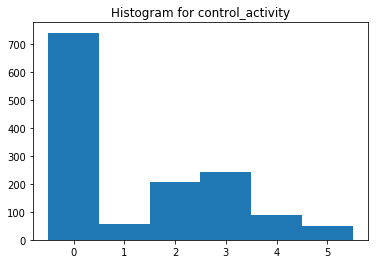

In [29]:
all_df.control_activity.fillna(0, inplace=True)
column_hist(all_df.control_activity)

In [30]:
np.any(all_df.control_activity.isna())

False

In [31]:
all_df.loc[:, 'control_activity'] = all_df.loc[:, 'control_activity'].astype('int').astype('category')

## `control_tension`

In [32]:
np.any(all_df.control_tension.isna())

True

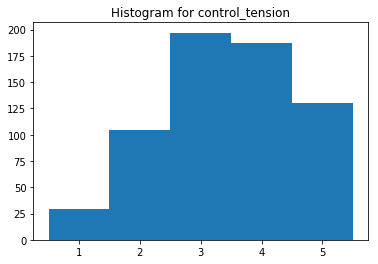

In [33]:
column_hist(all_df.control_tension)

In [34]:
all_df.control_tension.median()

3.0

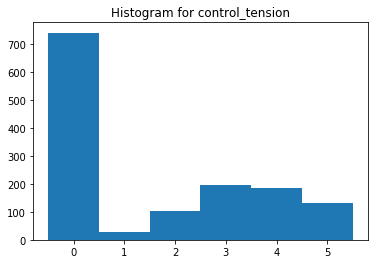

In [35]:
all_df.control_tension.fillna(0, inplace=True)
column_hist(all_df.control_tension)

In [36]:
np.any(all_df.control_tension.isna())

False

In [37]:
all_df.loc[:, 'control_tension'] = all_df.loc[:, 'control_tension'].astype('int').astype('category')

## `control_familiarity`

Drop this column, as it doesn't make any sense.

In [38]:
all_df = all_df.drop(columns='control_familiarity')
all_df.describe()

,age,control_engagement,control_positivity,control_like_dislike,song_chillsshiversthrills,song_activity,song_tension,song_familiarity,song_engagement,song_positivity,song_like_dislike,control_inspired,control_wonder,control_spirituality,control_thrills,control_chills,control_tenderness,control_nostalgia,control_goosebumps,control_overwhelmed,control_shivers,song_inspired,song_wonder,song_spirituality,song_thrills,song_chills,song_tenderness,song_nostalgia,song_goosebumps,song_overwhelmed,song_shivers,control_transcendence,control_sadness,control_joyfulactivation,control_peacefulness,control_power,song_transcendence,song_sadness,song_joyfulactivation,song_peacefulness,song_power,personality_trusting,personality_artistic,personality_imagination,personality_reserved,personality_outgoing,personality_lazy,personality_stress,personality_nervous,personality_fault,personality_thorough,concentration,musicpref_traditional_irish,musicpref_jazz,musicpref_folk,musicpref_hiphop,musicpref_classical,musicpref_none,musicpref_rock,musicpref_hip_hop,musicpref_world,musicpref_pop,musicpref_dance
count,1388.000000,647.000000,647.000000,647.000000,273.000000,1293.000000,1084.000000,1293.000000,1293.000000,1293.000000,1293.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.000000,163.000000,108.000000,108.000000,372.000000,163.000000,163.000000,108.000000,108.000000,108.000000,0.0,0.0,0.0,0.0,647.000000,55.000000,55.000000,55.000000,55.000000,967.000000,648.000000,648.000000,647.000000,648.000000,647.000000,648.000000,648.000000,647.000000,647.000000,647.000000,648.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000
mean,26.363833,3.098918,3.197836,2.996909,2.051282,3.351121,3.619926,2.371230,3.379737,3.232019,3.211910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.388889,2.269939,2.111111,2.092593,2.051075,2.392638,2.552147,1.824074,2.351852,1.740741,NaN,NaN,NaN,NaN,3.179289,2.672727,2.381818,2.127273,2.727273,3.324716,3.662037,2.314815,3.749614,3.151235,3.156105,3.635802,3.121914,3.627512,3.200927,3.162287,3.845679,0.050432,0.193804,0.077810,0.044669,0.326369,0.007925,0.440922,0.137608,0.162824,0.669308,0.206052
std,13.261152,1.207349,1.063522,1.273688,1.190159,1.138474,1.224334,1.402621,1.343644,1.212804,1.412553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.331385,1.286499,1.341873,1.249576,1.226427,1.446305,1.515978,1.100796,1.362480,1.096898,NaN,NaN,NaN,NaN,1.150584,1.414928,1.353882,1.139437,1.483921,1.213297,1.024421,1.205204,1.058240,1.115563,1.173253,1.134024,1.122600,1.098289,1.108565,1.036456,1.056786,0.218914,0.395420,0.267969,0.206650,0.469053,0.088701,0.496676,0.344612,0.369338,0.470632,0.404614
min,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,2.000000,3.000000,2.000000,1.000000,3.000000,3.000000,1.000000,2.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,3.000000,1.000000,1.000000,1.000000,1.000000,2.500000,3.000000,1.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,23.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4.000000,2.000000,4.000000,3.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,3.000000,3.000000,2.000000,2.00000

## `control_engagement`

In [39]:
np.any(all_df.control_engagement.isna())

True

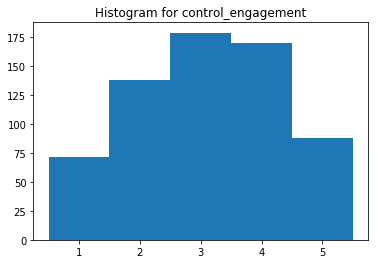

In [40]:
column_hist(all_df.control_engagement)

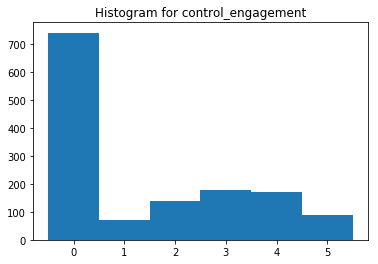

In [41]:
all_df.control_engagement.fillna(0, inplace=True)
column_hist(all_df.control_engagement)

In [42]:
all_df.loc[:, 'control_engagement'] = all_df.loc[:, 'control_engagement'].astype('int').astype('category')

## Fill other appropriate columns' NA values with 0 and 'categorify'

In [43]:
cols_to_fill_with_zero = [
    'control_positivity','control_like_dislike','song_chillsshiversthrills','song_activity','song_tension',
    'song_familiarity','song_engagement','song_positivity','song_like_dislike','song_inspired','song_wonder',
    'song_spirituality','song_thrills','song_chills','song_tenderness','song_nostalgia','song_goosebumps',
    'song_overwhelmed','song_shivers','control_power','song_transcendence','song_sadness','song_joyfulactivation',
    'song_peacefulness','song_power','personality_trusting','personality_artistic','personality_imagination',
    'personality_reserved','personality_outgoing','personality_lazy','personality_stress','personality_nervous',
    'personality_fault','personality_thorough','concentration','musicpref_traditional_irish','musicpref_jazz',
    'musicpref_folk','musicpref_hiphop','musicpref_classical','musicpref_none','musicpref_rock','musicpref_hip_hop',
    'musicpref_world','musicpref_pop','musicpref_dance','musical_background','visual_impairments',
    'hearing_impairments'
]

cols_to_drop = [
    'control_inspired','control_wonder','control_spirituality','control_thrills','control_chills',
    'control_tenderness','control_nostalgia','control_goosebumps','control_overwhelmed','control_shivers',
    'control_transcendence','control_sadness','control_joyfulactivation','control_peacefulness','dob'
]

In [44]:
for c in cols_to_fill_with_zero:
    all_df[c].fillna(0, inplace=True)
    all_df.loc[:, c] = all_df.loc[:, c].astype('int').astype('category')    

## Drop columns that don't make sense (e.g., familiarity with control stimulus)

In [45]:
for c in cols_to_drop:
    all_df = all_df.drop(columns=c)

Also drop `Unnamed: 0` column.

In [46]:
all_df = all_df.drop(columns='Unnamed: 0')

In [47]:
all_df.describe()

,age
count,1388.000000
mean,26.363833
std,13.261152
min,6.000000
25%,17.000000
50%,23.000000
75%,33.000000
max,81.000000


## Fill NA values with column mode/'other' as appropriate

In [48]:
cols_to_fill_with_other = [
    'location', 'sex', 'nationality', 'language'
]

In [49]:
for c in cols_to_fill_with_other:
    all_df[c].fillna('other', inplace=True)

# Write out CSV

In [50]:
all_df.to_csv(Path('data', 'good_reaction_trials_categorified.csv'))

In [51]:
pd.read_csv(Path('data', 'good_reaction_trials_categorified.csv')).columns

Index(['_id', 'location', 'sex', 'musical_background', 'nationality',
       'visual_impairments', 'musical_expertise', 'hearing_impairments', 'age',
       'critical_reaction', 'control_activity', 'control_tension',
       'control_engagement', 'control_positivity', 'control_like_dislike',
       'song_chillsshiversthrills', 'song_activity', 'song_tension',
       'song_familiarity', 'song_engagement', 'song_positivity',
       'song_like_dislike', 'song_inspired', 'song_wonder',
       'song_spirituality', 'song_thrills', 'song_chills', 'song_tenderness',
       'song_nostalgia', 'song_goosebumps', 'song_overwhelmed', 'song_shivers',
       'control_power', 'song_transcendence', 'song_sadness',
       'song_joyfulactivation', 'song_peacefulness', 'song_power', 'language',
       'personality_trusting', 'personality_artistic',
       'personality_imagination', 'personality_reserved',
       'personality_outgoing', 'personality_lazy', 'personality_stress',
       'personality_nervous',

# Thoughts

- Might want to look at treating Likert-type items as categorical and using a completely separate category for missing values, instead of filling them with the mean.
- Data augmentation to balance classes
- Exclude columns which are all the same for most people (chills, etc.)
- Take results from working with other songs and break out weighted F-beta scores for comparison with *Hallelujah*-only results